# Optimisation Algorithms

## Hill Climbing

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import sklearn.datasets
import math
%matplotlib inline

def new_plot():
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    return fig, ax

# Steps

1. plot the start variable
2. plot the neighbors
3. plot the best neighbor as current
4. -> 2

In [19]:
def get_neighbours(x):
    return x + 1, x - 1


def init_hill_climbing():
    current = ax.scatter([], [], c='orange', zorder=5, s=100)
    equal = ax.scatter([], [], c='orange', zorder=5, s=100)
    better = ax.scatter([], [], c='green', zorder=5, s=100)
    worse = ax.scatter([], [], c='red', zorder=5, s=100)
    solution = ax.scatter([], [], c='green', zorder=5, s=100)
    converged = False
    return current, [better, equal, worse], solution, converged

In [20]:
def hill_climb(step):
    global converged
    global current_solution
    if step % 2 == 0:
        for plot in neighbour_plots:
            plot.set_visible(False)
        if converged:
            current_plot.set_visible(False)
            solution_plot.set_offsets([current_solution, f(current_solution)])
        else:
            current_plot.set_offsets([current_solution, f(current_solution)])
    else:
        local_neighbours = get_neighbours(current_solution)
        local_neighbour_solutions = [f(i) for i in local_neighbours]
        local_neighbour_quality = [[],[],[]]
        
        for i in range(2):
            if local_neighbour_solutions[i] > f(current_solution):
                local_neighbour_quality[0].append(local_neighbours[i])
            elif local_neighbour_solutions[i] == f(current_solution):
                local_neighbour_quality[1].append(local_neighbours[i])
            else:
                local_neighbour_quality[2].append(local_neighbours[i])
       
        for i in range(3):
            if len(local_neighbour_quality[i]) > 0:
                neighbour_plots[i].set_visible(True)
                neighbour_plots[i].set_offsets(np.stack([local_neighbour_quality[i], f(np.array(local_neighbour_quality[i]))]).T)

        if max(local_neighbour_solutions) > f(current_solution):
            current_solution = local_neighbours[local_neighbour_solutions.index(max(local_neighbour_solutions))]
        else:
            converged = True

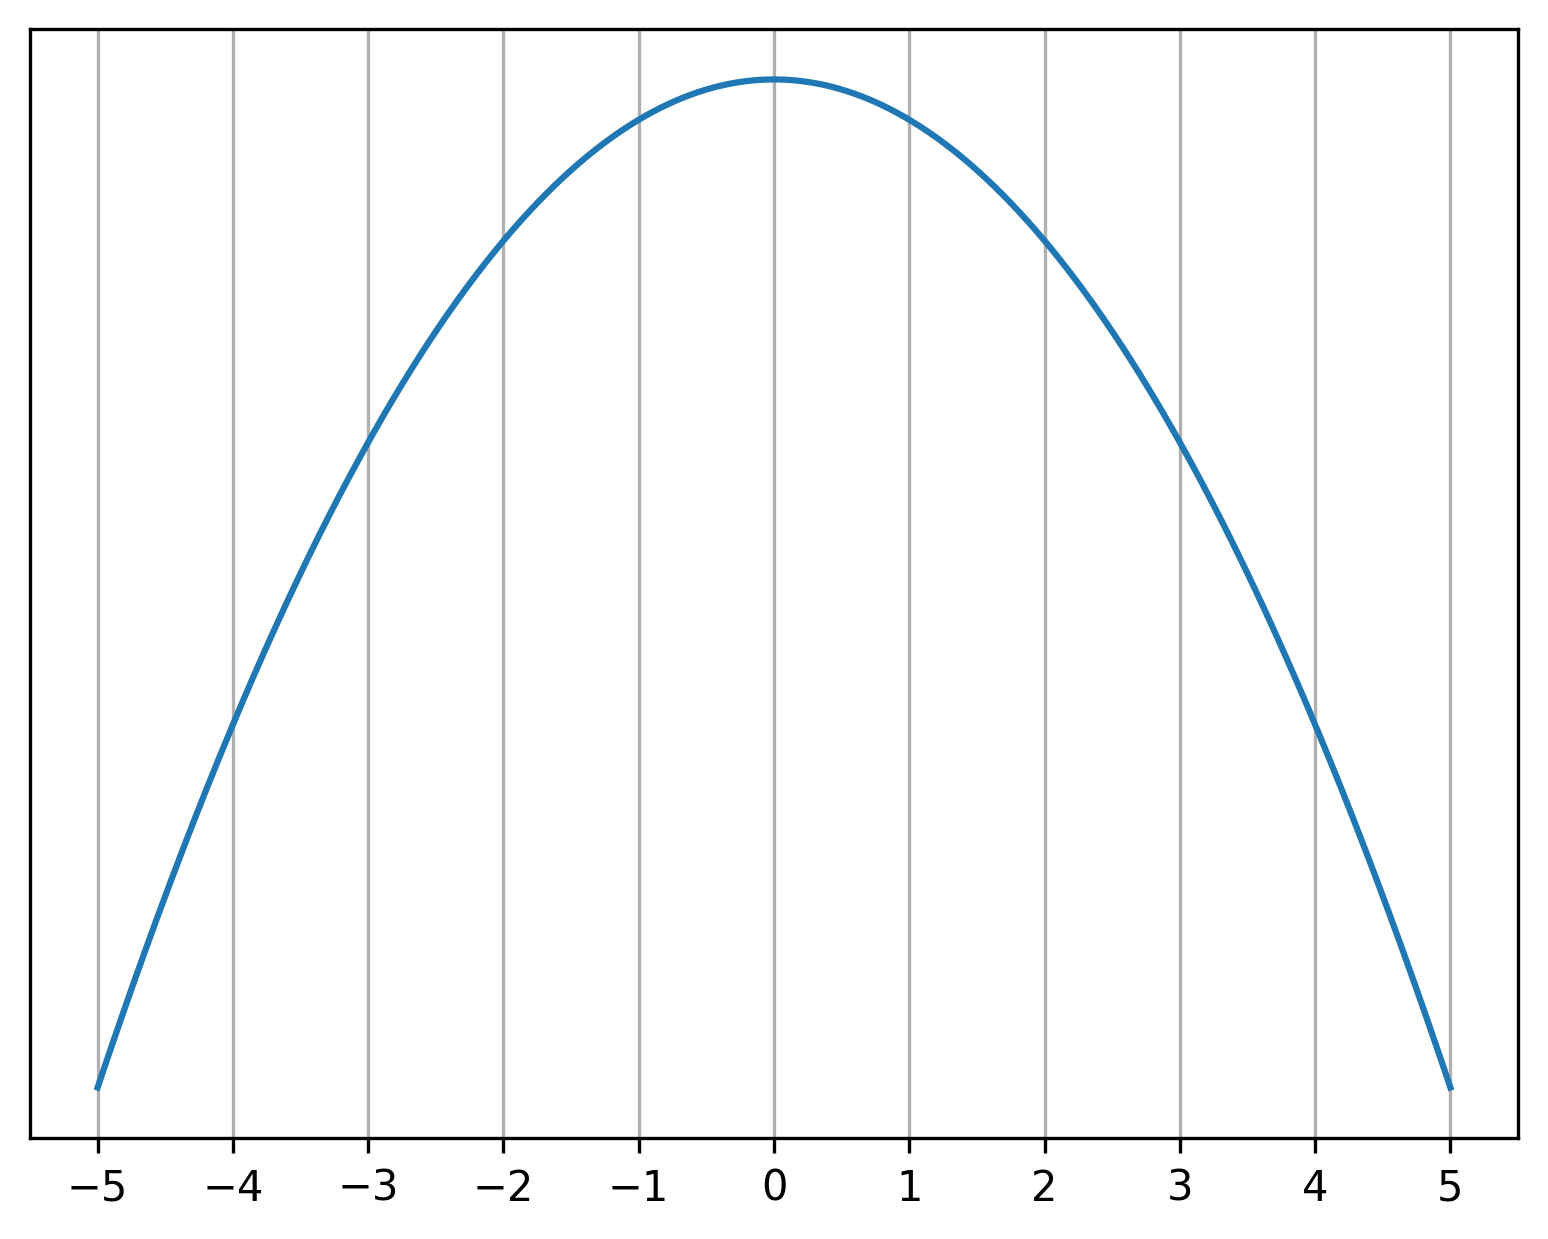

In [25]:
def f(x):
    return -x**2


x = np.linspace(-5, 5, 1000)
fig, ax = new_plot()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.grid()
ax.plot(x, f(x))

current_plot, neighbour_plots, solution_plot, converged = init_hill_climbing()
current_solution = -4

anim = animation.FuncAnimation(fig=fig, func=hill_climb, frames=11, interval=500)
anim.save('optimal.gif')

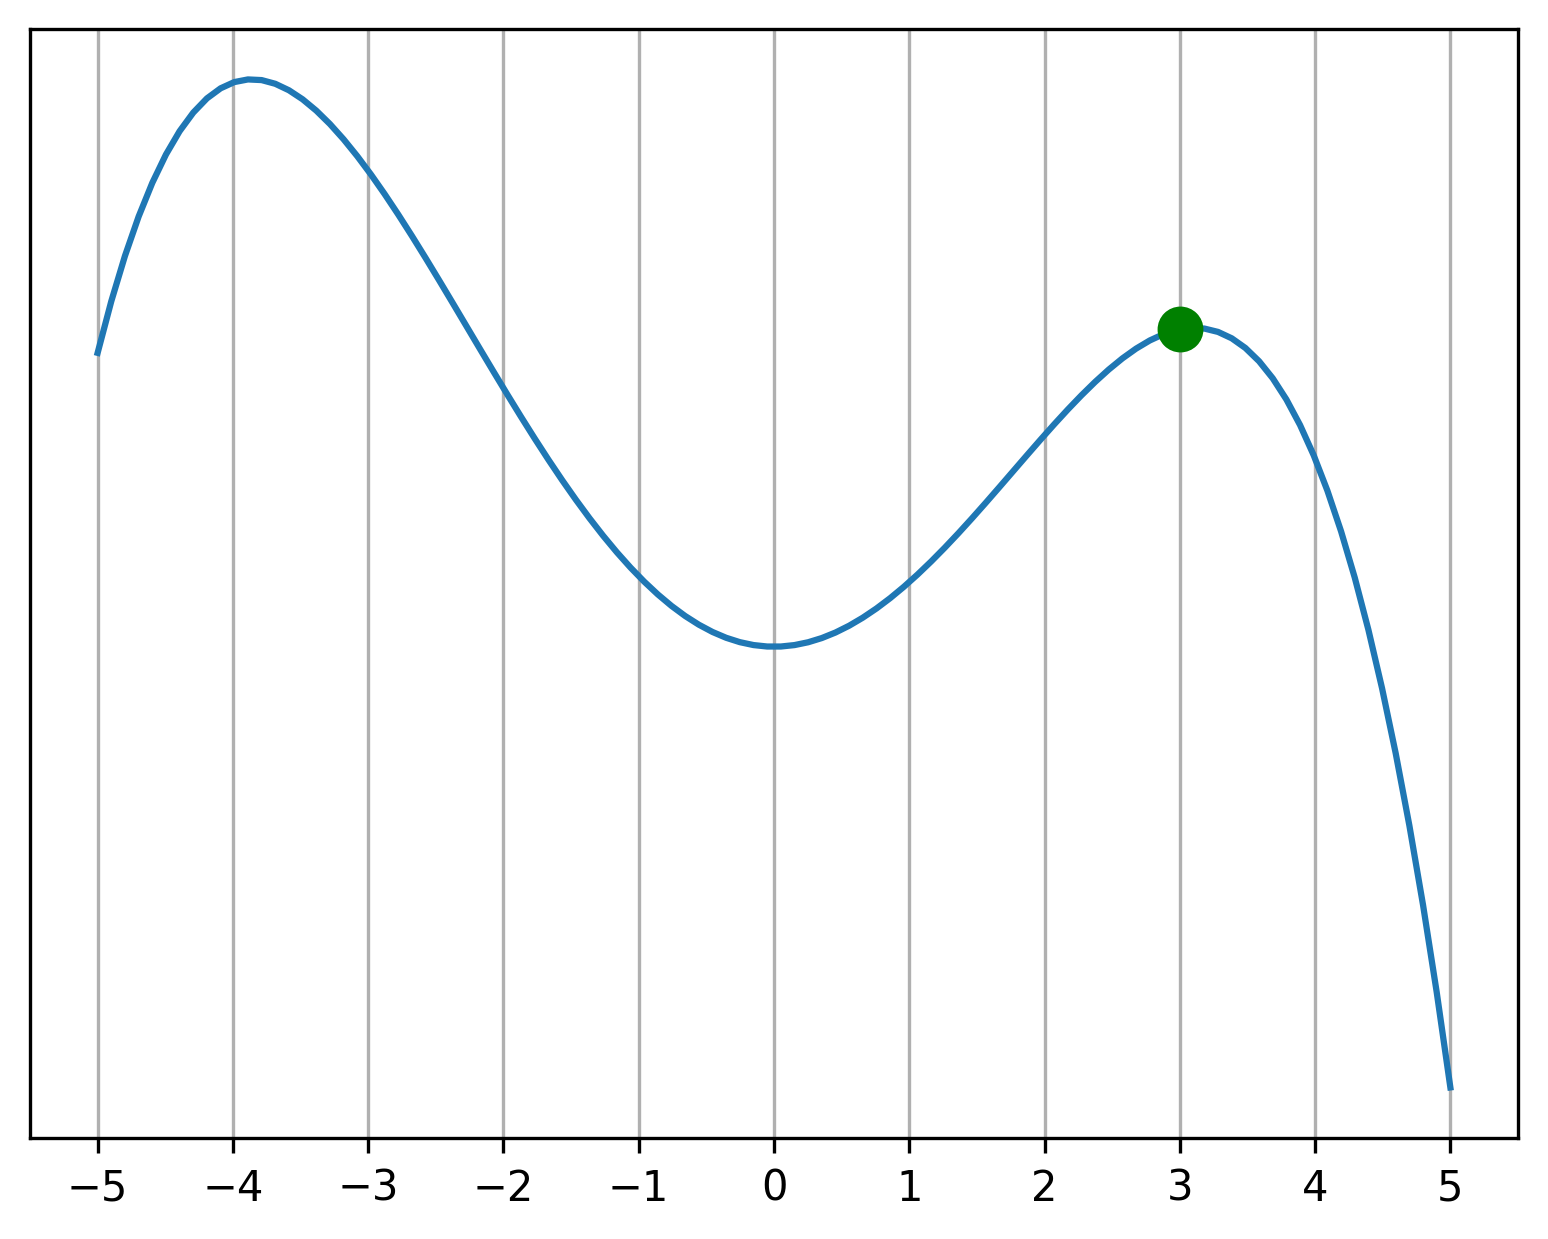

In [29]:
def f(x):
    return (-x**4 - x**3 + 24*x**2)


x = np.linspace(-5, 5, 100)
fig, ax = new_plot()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.grid()
ax.plot(x, f(x))

current_plot, neighbour_plots, solution_plot, converged = init_hill_climbing()
current_solution = 1

anim = animation.FuncAnimation(fig=fig, func=hill_climb, frames=7, interval=500)
anim.save('local_maxima.gif')

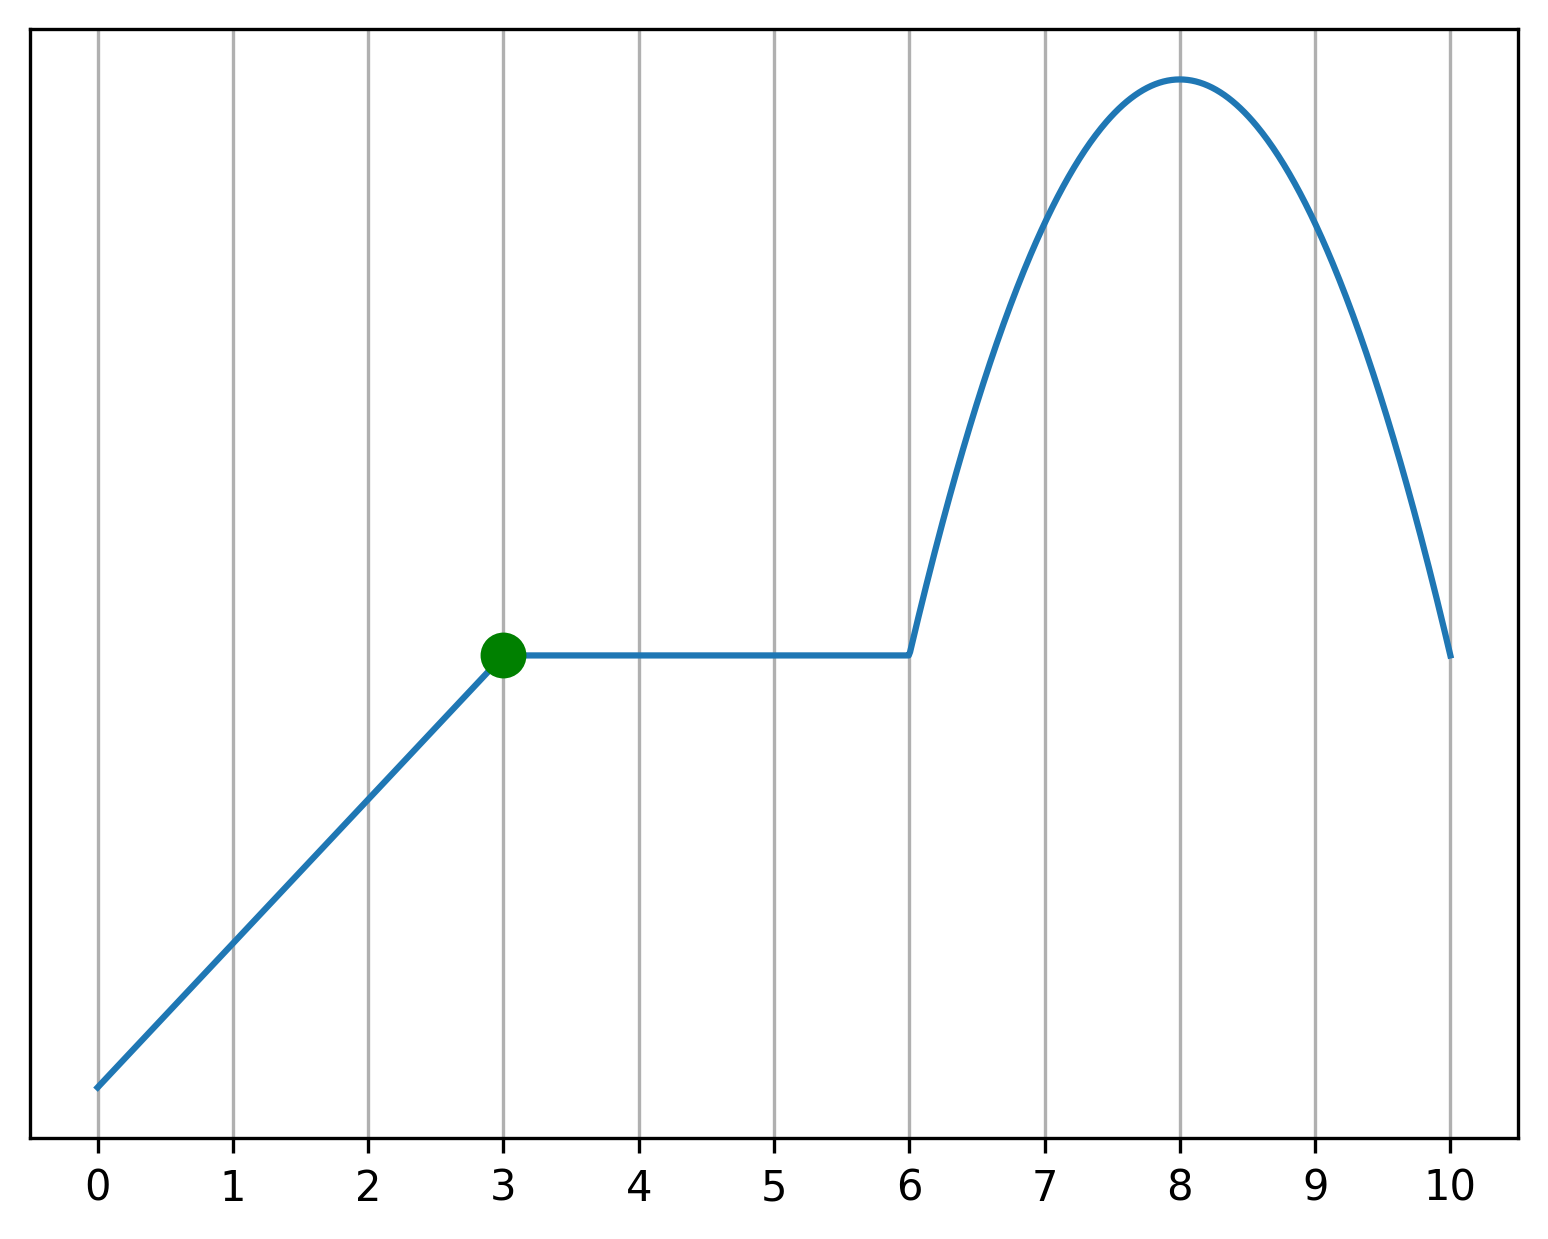

In [31]:
def f(x):
    
    def _f(x):
        if x < 3:
            return x
        elif x < 6:
            return 3
        else:
            return -(x-8)**2+7

    return np.vectorize(_f)(x)

x = np.linspace(0, 10, 1000)
y = [f(x) for x in x]
fig, ax = new_plot()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.grid()
ax.plot(x, y)

current_plot, neighbour_plots, solution_plot, converged = init_hill_climbing()
current_solution = 1

anim = animation.FuncAnimation(fig=fig, func=hill_climb, frames=7, interval=500)
anim.save('plateau.gif')

## Simulated Annealing

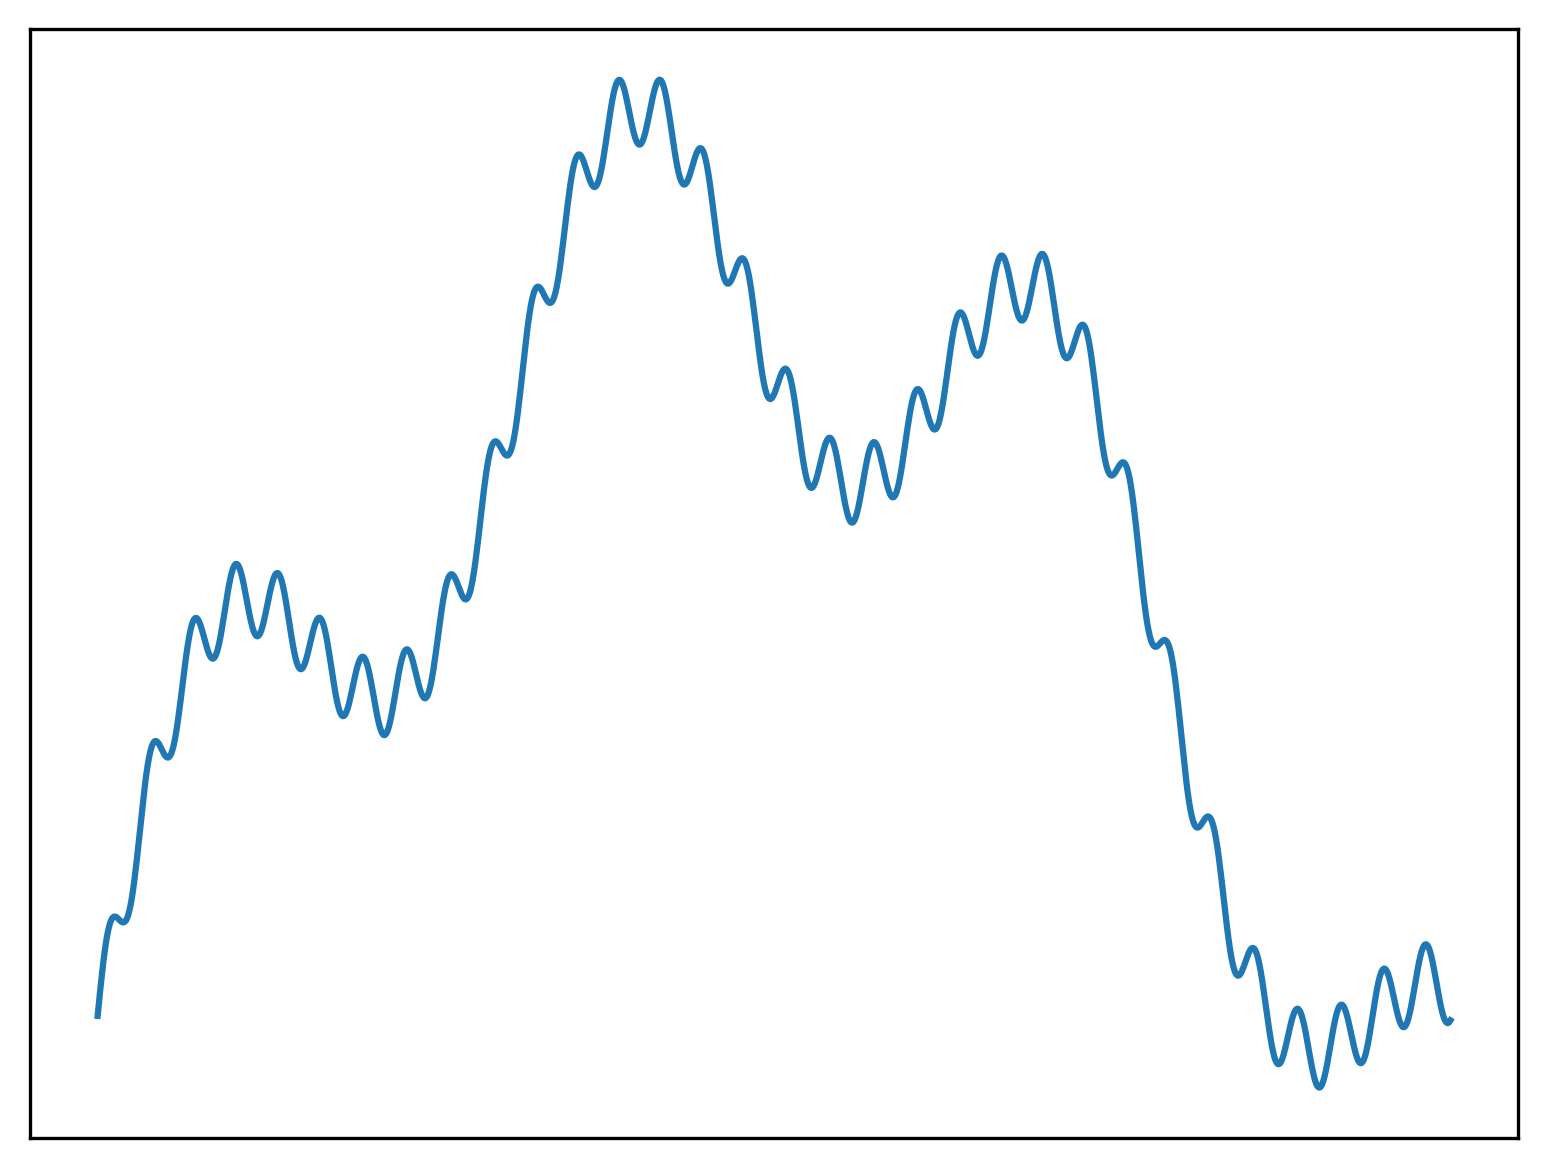

In [32]:
def f(x):
    return 4*math.sin(x) + 20*math.sin(0.1*x) + 80*math.sin(1/60*x)

x = np.linspace(0, 200, 1000)
fig, ax = new_plot()
ax.plot(x, np.vectorize(f)(x))